In [4]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import glob as gb
import re

## img file

In [55]:
import glob as gb
import re
# img_dir_path = '/projectdata/dysklab01/data/'
img_dir_path = '../../resources/ml_3d_cell_img_data/'
img_data_file_list = gb.glob1(img_dir_path,'*img.mat')
img_true_file_list = gb.glob1(img_dir_path,'*seg3D*')
img_data_dic, img_true_dic = dict(), dict()
img_keyname_list = []

for file_name in img_data_file_list:
    img_data_dic[re.findall('[0-9]{4}',file_name)[0]] = img_dir_path + file_name
for file_name in img_true_file_list:
    img_true_dic[re.findall('[0-9]{4}',file_name)[0]] = img_dir_path + file_name
assert len(img_data_dic) == len(img_true_dic), '## Number of input image should equal to that of labeled image ##'
img_keyname_list = list(img_data_dic.keys())
img_data_dic,'', img_true_dic, img_keyname_list

({'0930': '../../resources/ml_3d_cell_img_data/IMQ_D9_0930_Ch2_img.mat',
  '1015': '../../resources/ml_3d_cell_img_data/IMQ_D9_1015_Ch2_img.mat',
  '1030': '../../resources/ml_3d_cell_img_data/IMQ_D9_1030_Ch2_img.mat',
  '1045': '../../resources/ml_3d_cell_img_data/IMQ_D9_1045_Ch2_img.mat',
  '1100': '../../resources/ml_3d_cell_img_data/IMQ_D9_1100_Ch2_img.mat',
  '1115': '../../resources/ml_3d_cell_img_data/IMQ_D9_1115_Ch2_img.mat',
  '1130': '../../resources/ml_3d_cell_img_data/IMQ_D9_1130_Ch2_img.mat',
  '1230': '../../resources/ml_3d_cell_img_data/IMQ_D9_1230_Ch2_img.mat',
  '1400': '../../resources/ml_3d_cell_img_data/IMQ_D9_1400_Ch2_img.mat',
  '1430': '../../resources/ml_3d_cell_img_data/IMQ_D9_1430_Ch2_img.mat',
  '1445': '../../resources/ml_3d_cell_img_data/IMQ_D9_1445_Ch2_img.mat',
  '1530': '../../resources/ml_3d_cell_img_data/IMQ_D9_1530_Ch2_img.mat',
  '1545': '../../resources/ml_3d_cell_img_data/IMQ_D9_1545_Ch2_img.mat',
  '1800': '../../resources/ml_3d_cell_img_data/IMQ_

In [111]:
import scipy.io as sio
import os
def load_img_data(key):
    ''' load img data, required variables: img_data_dic, img_keyname_list '''
    return sio.loadmat(img_data_dic[key])['img'] if key in img_keyname_list else None
def load_img_label(key):
    ''' load img label, required variables: img_true_dic, img_keyname_list '''
    if key in img_keyname_list:
        data = sio.loadmat(img_true_dic[key])
        data = {'colorMap': data['colorMap'], 'label': data['seg3D']}
    else:
        data = None
    return data

In [182]:

# for _, v in img_data_dic.items():
# load_img_data(img_keyname_list[0])

In [183]:
file_key = img_keyname_list[10]

In [199]:
img, img_label = load_img_data(file_key), load_img_label(file_key)
img.shape, img_label['colorMap'].shape, img_label['label'].shape

((512, 512, 100), (113886, 3), (512, 512, 100))

In [198]:
img_label['colorMap'][19]

array([210, 165,  25], dtype=uint8)

numpy.ndarray

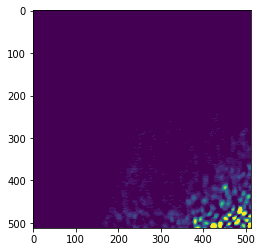

In [186]:
# Top view XY
# plt.imshow(img[:,:,2],cmap='gray', vmin=img[:,:,2].min(),vmax=20)
plt.imshow(img[:,:,2], vmin=img[:,:,2].min(),vmax=20)
type(img == 3)

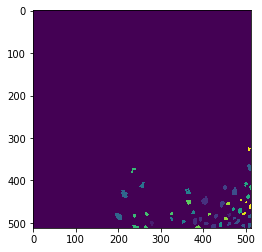

In [187]:
# plt.imshow(img_label['label'][:,:,2],vmin=img_label['label'][:,:,2].min(),vmax=1,cmap='gray')
plt.imshow(img_label['label'][:,:,2],vmin=img_label['label'][:,:,2].min())

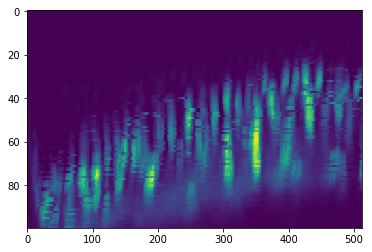

In [188]:
# Front view XZ
plt.imshow(img[:,5,:].T,aspect='auto')

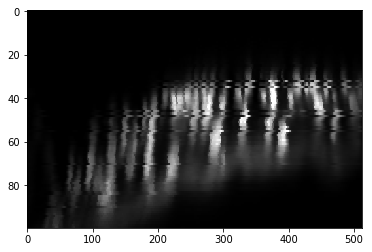

In [189]:
# Right view YZ
plt.imshow(img[5,:,:].T,cmap='gray',aspect='auto')

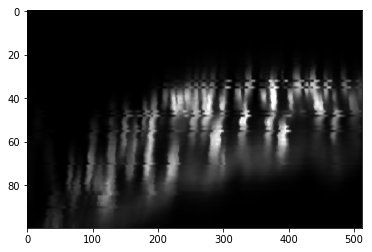

In [190]:
# Right view YZ
plt.imshow(img[5,:,:].T,cmap='gray',aspect='auto',interpolation='hamming')

## seg3D file

In [191]:
file = '/projectdata/dysklab01/data/IMQ_D9_1015_Ch2_seg3D.mat'
seg = sio.loadmat(file)
seg.keys()

TypeError: 'NoneType' object is not iterable

In [192]:
smap = seg['colorMap']
seg3D = seg['seg3D']

NameError: name 'seg' is not defined

In [77]:
smap.shape

NameError: name 'smap' is not defined

In [78]:
# Top view XY
plt.imshow(seg3D[:,:,1].T, cmap='gray')

NameError: name 'seg3D' is not defined

In [79]:
# Front view XZ
plt.imshow(seg3D[:,5,:].T,cmap='gray',aspect='auto')

NameError: name 'seg3D' is not defined

In [80]:
# Right view YZ
plt.imshow(seg3D[5,:,:].T,cmap='gray',aspect='auto')

NameError: name 'seg3D' is not defined

In [81]:
import pandas as pd
aa = pd.DataFrame(seg3D[:,5,:])

NameError: name 'seg3D' is not defined

In [105]:
unique_list = np.ndarray(1)
for i in aa.columns:
    unique_list = np.concatenate((unique_list, np.asarray(aa[i].unique())))

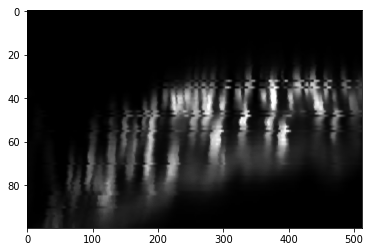

In [106]:
## compare rawdata and ground truth
# Right view YZ
plt.imshow(img[5,:,:].T,cmap='gray',aspect='auto',interpolation='hamming')

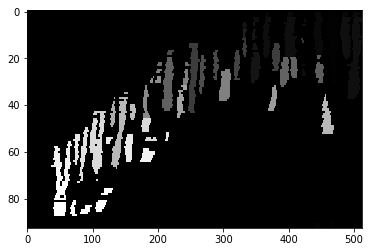

In [107]:
# Right view YZ
plt.imshow(seg3D[5,:,:].T,cmap='gray',aspect='auto')